<a href="https://colab.research.google.com/github/XavierCarrera/Titanic-KaggleChallenge/blob/main/Titanic_KaggleChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Problem Definition

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/db/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/db/test.csv")

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
test.drop(["PassengerId","Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)

In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S
...,...,...,...,...,...,...
413,3,male,NaN,0,0,S
414,1,female,39.0,0,0,C
415,3,male,38.5,0,0,S
416,3,male,NaN,0,0,S


# Exploratory Data Analysis

In [ ]:
train.Sex.value_counts().sort_values()

female    259
male      453
Name: Sex, dtype: int64

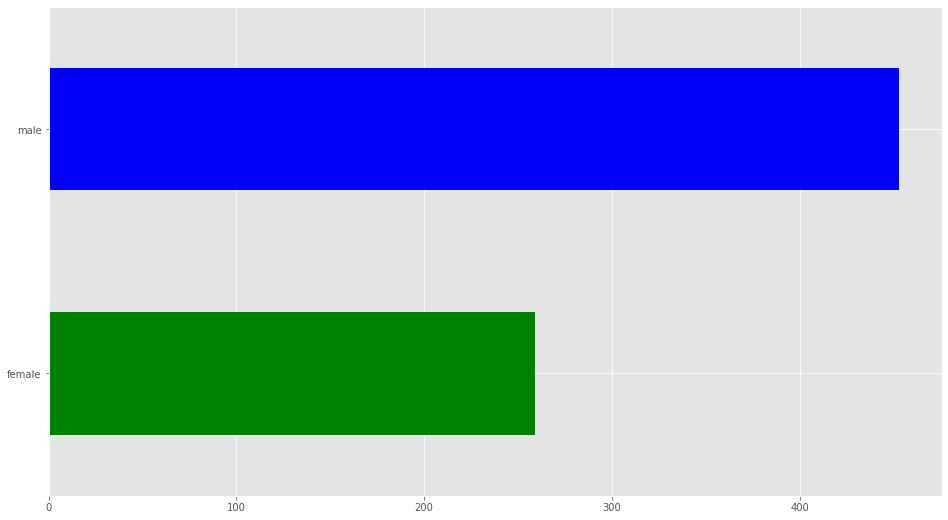

In [ ]:
train.Sex.value_counts().sort_values().plot(kind = "barh", color={"green", "blue"})

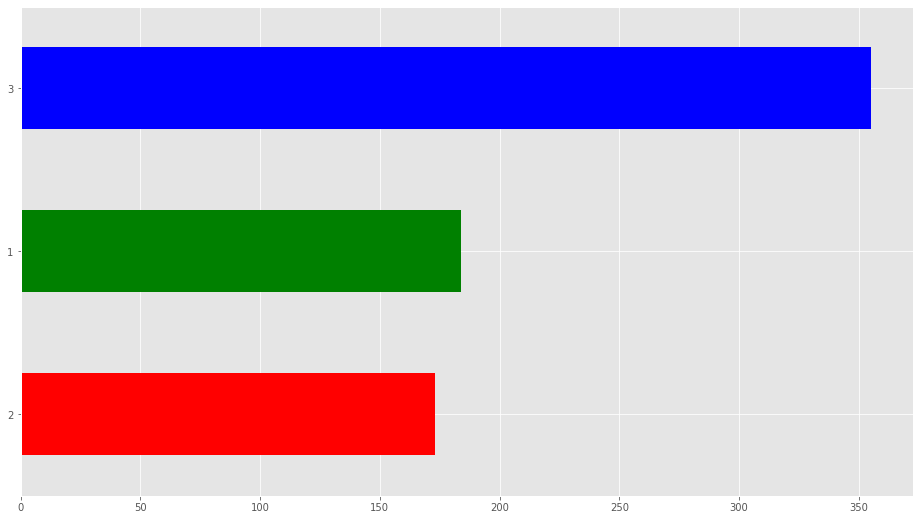

In [ ]:
train.Pclass.value_counts().sort_values().plot(kind = "barh", color={"green", "blue", "red"})

In [ ]:
train.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


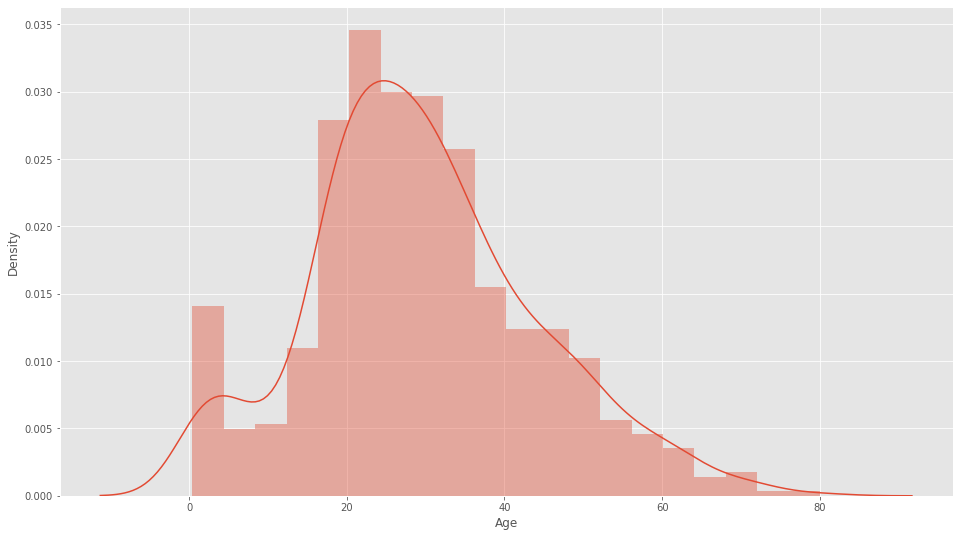

In [ ]:
sns.distplot(train["Age"])

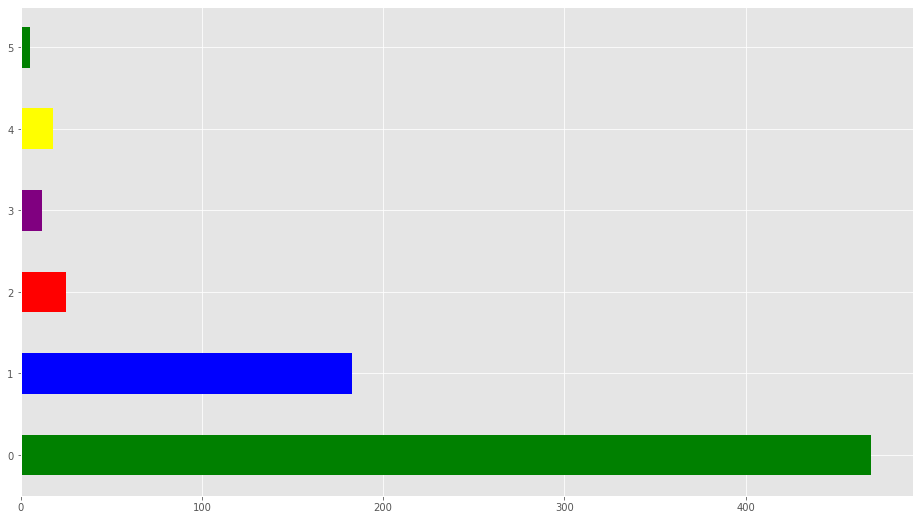

In [ ]:
train.SibSp.value_counts().sort_index().plot(kind = "barh", color={"green", "blue", "red", "yellow", "purple"})

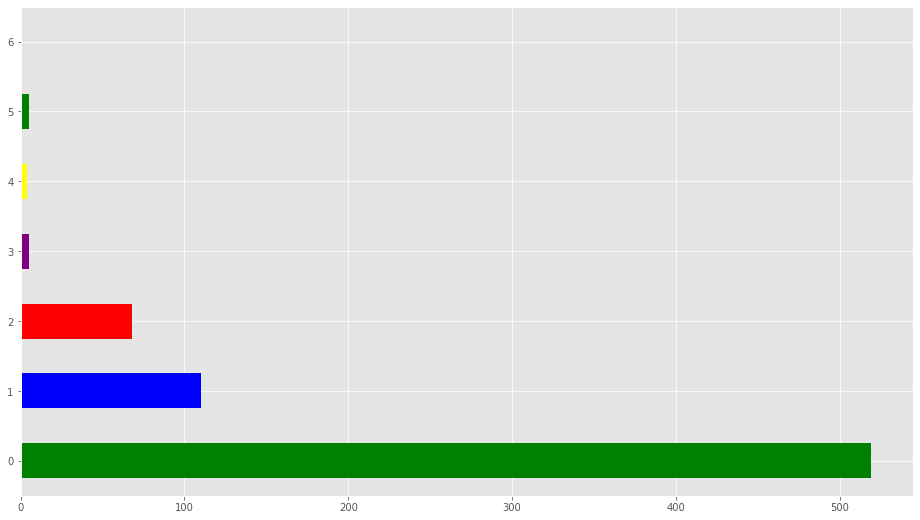

In [ ]:
train.Parch.value_counts().sort_index().plot(kind = "barh", color={"green", "blue", "red", "yellow", "purple"})

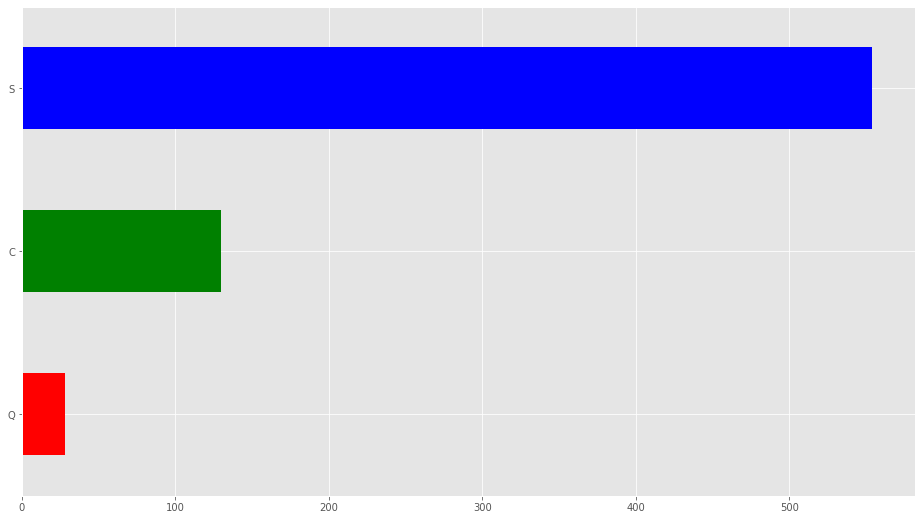

In [ ]:
train.Embarked.value_counts().sort_values().plot(kind = "barh", color={"green", "blue", "red"})

**Survivors Analysis**

In [ ]:
survived = train[train["Survived"] == 1]

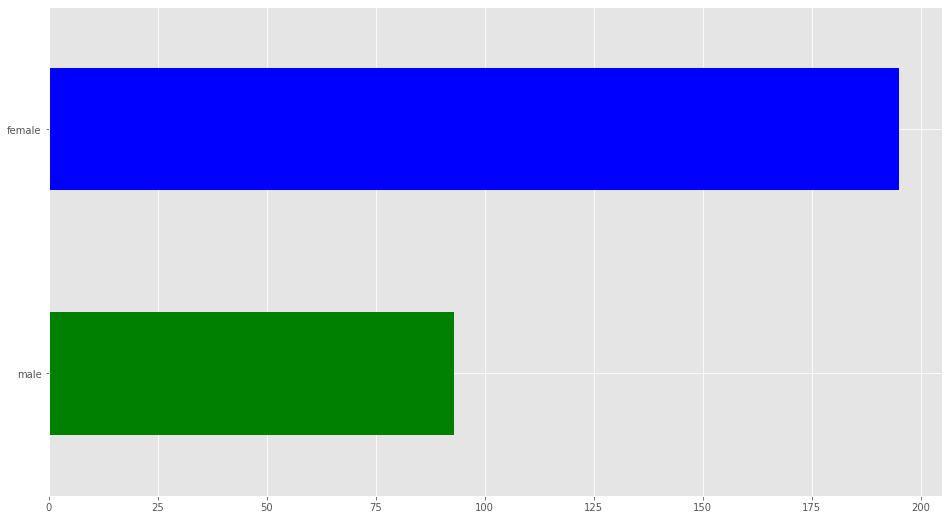

In [ ]:
survived.Sex.value_counts().sort_values().plot(kind = "barh", color={"green", "blue"})

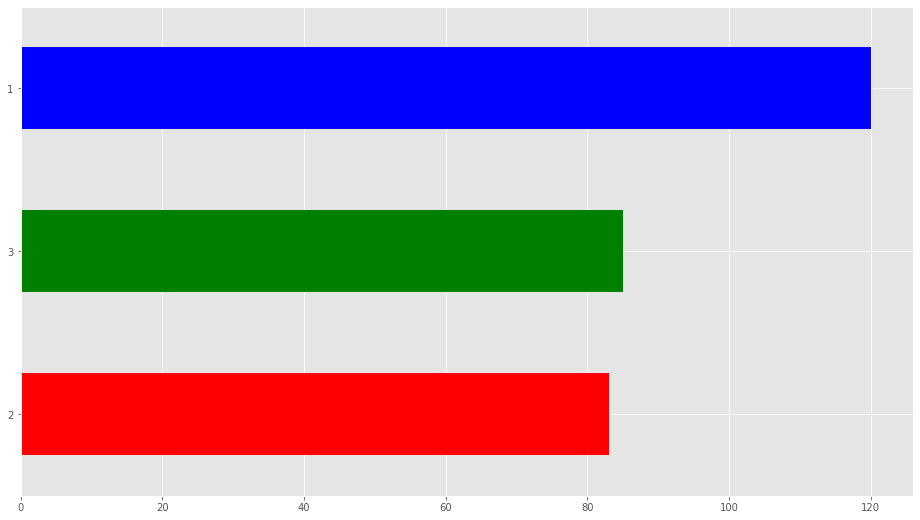

In [ ]:
survived.Pclass.value_counts().sort_values().plot(kind = "barh", color={"green", "blue", "red"})

In [ ]:
survived.Age.describe()

count    288.000000
mean      28.193299
std       14.859146
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


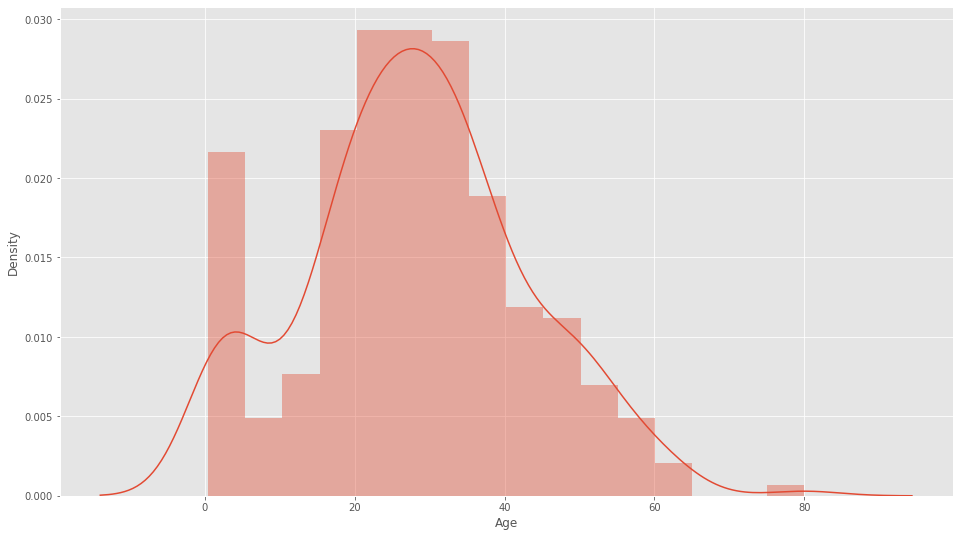

In [ ]:
sns.distplot(survived["Age"])

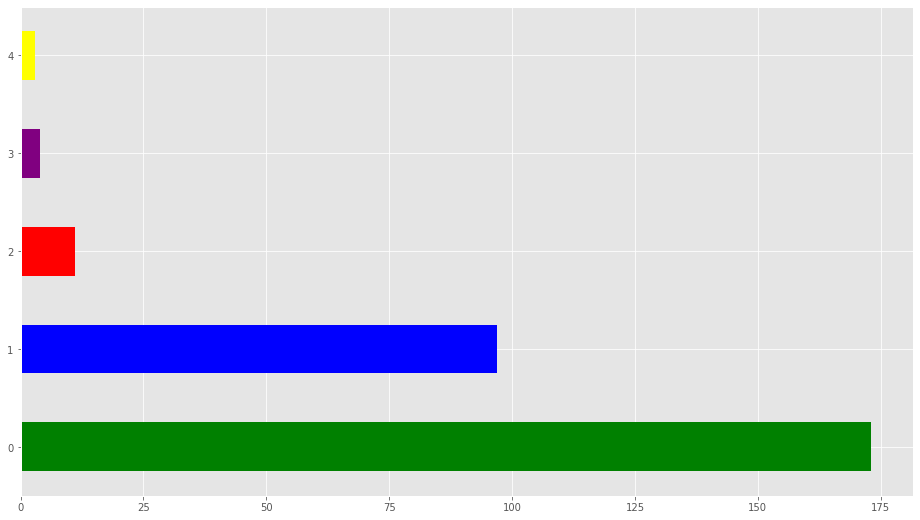

In [ ]:
survived.SibSp.value_counts().sort_index().plot(kind = "barh", color={"green", "blue", "red", "yellow", "purple"})

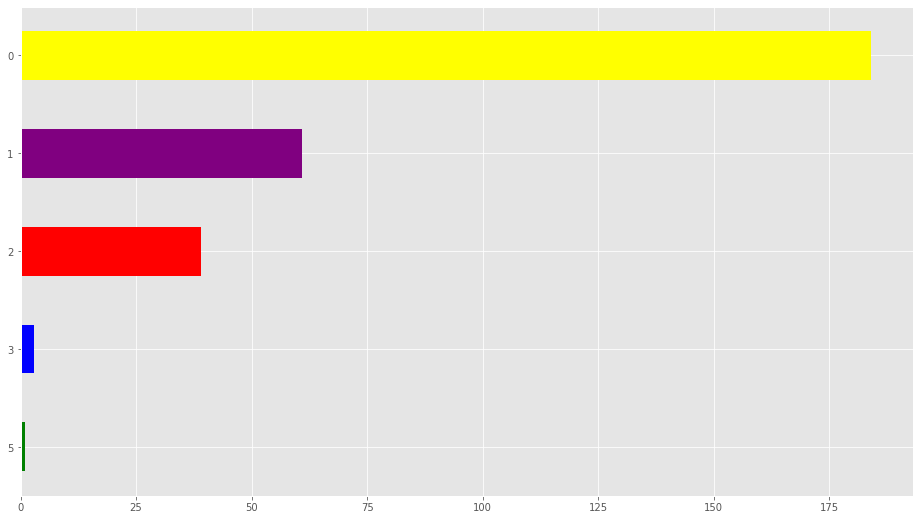

In [ ]:
survived.Parch.value_counts().sort_values().plot(kind = "barh", color={"green", "blue", "red", "yellow", "purple"})

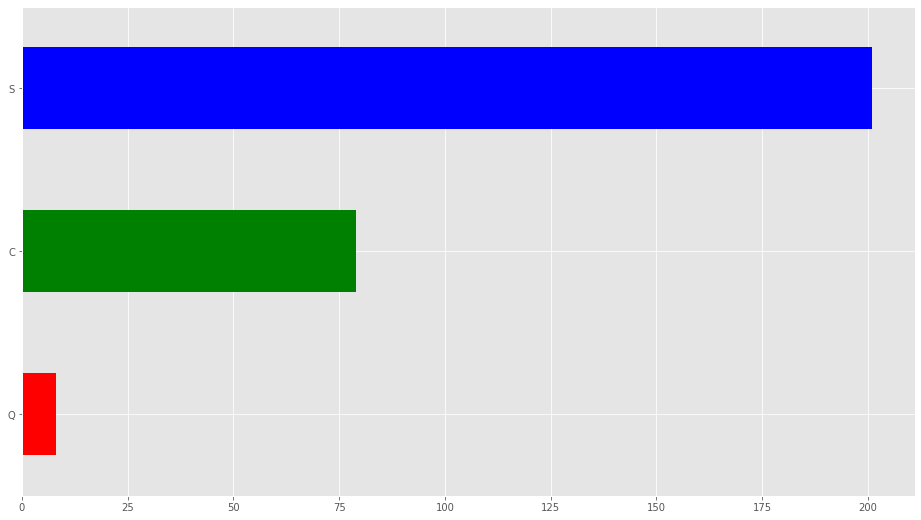

In [ ]:
survived.Embarked.value_counts().sort_values().plot(kind = "barh", color={"green", "blue", "red"})

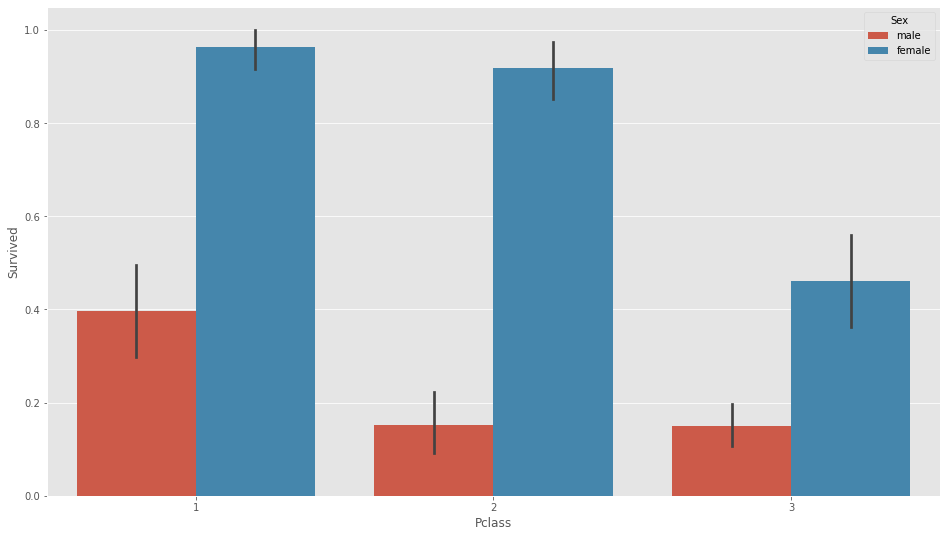

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=train, hue="Sex")

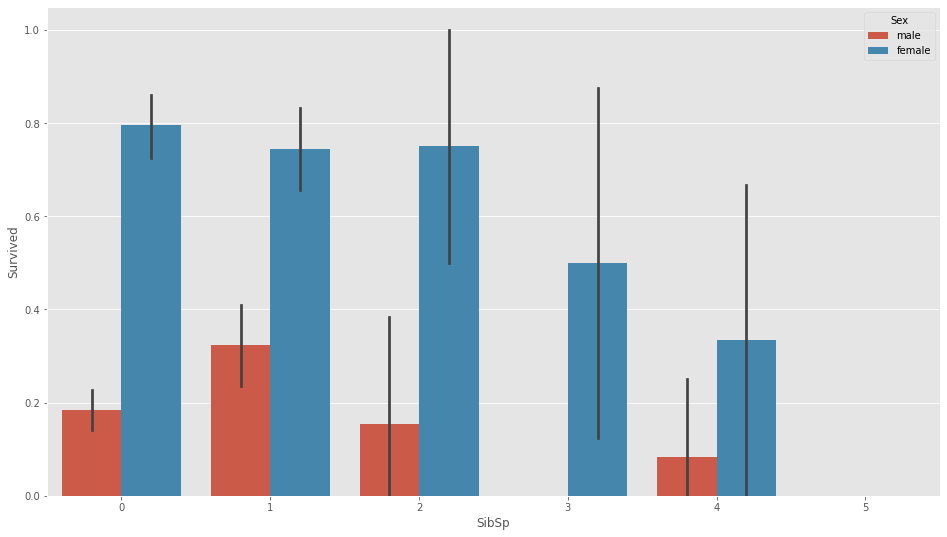

In [ ]:
sns.barplot(x="SibSp", y="Survived", data=train, hue="Sex")

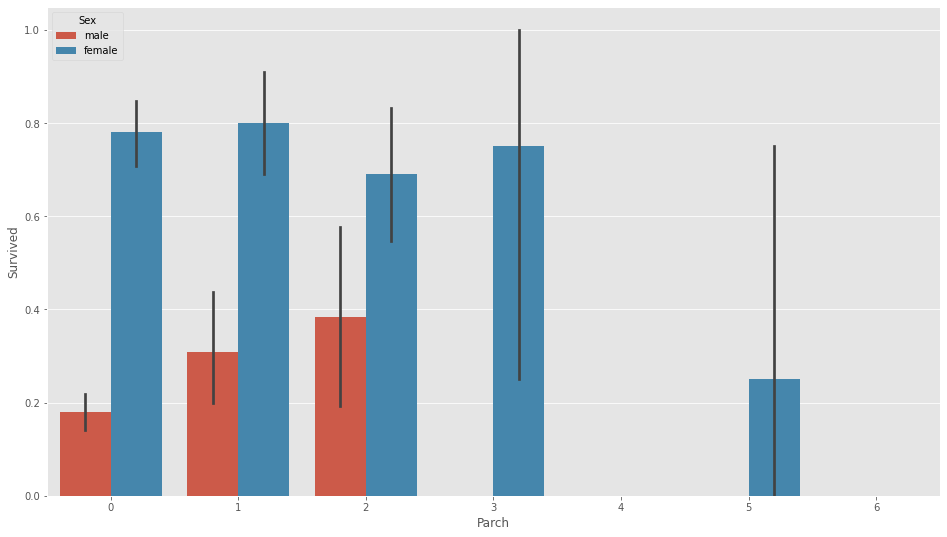

In [ ]:
sns.barplot(x="Parch",y="Survived", data=train, hue="Sex")

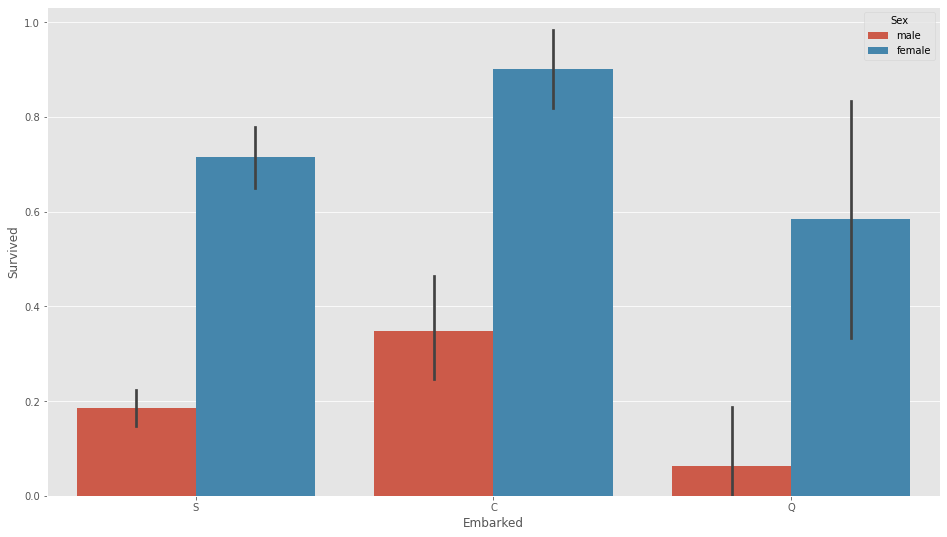

In [ ]:
sns.barplot(x="Embarked", y="Survived", data=train, hue = "Sex")

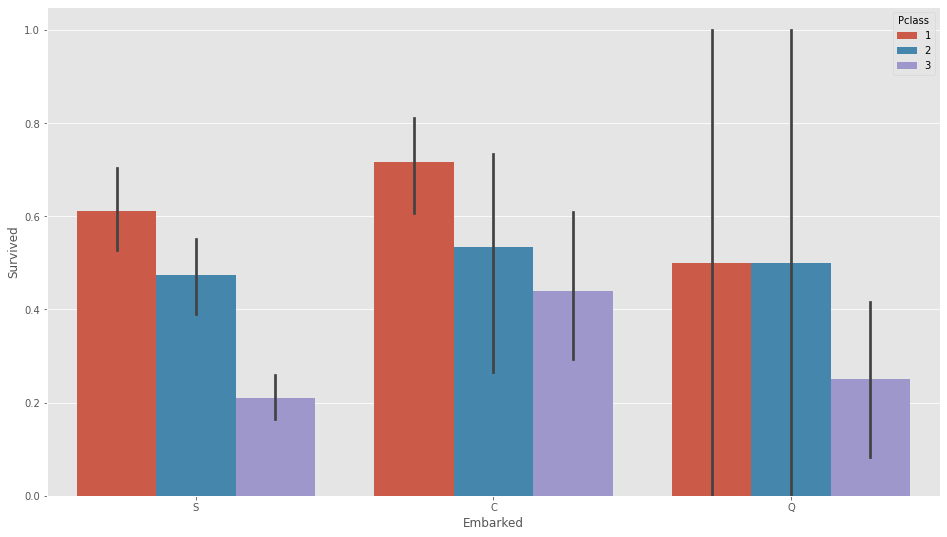

In [ ]:
sns.barplot(x="Embarked", y="Survived", data=train, hue = "Pclass")

# Feature Engineering

In [ ]:
model = pd.get_dummies(data = train, columns=["Pclass", "Sex", "Embarked"])
model

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,0,1,0,1,0,0,1
1,1,38.0,1,0,1,0,0,1,0,1,0,0
2,1,26.0,0,0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,1,0,0,1,0,0,0,1
4,0,35.0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,0,0,1,1,0,0,1,0
886,0,27.0,0,0,0,1,0,0,1,0,0,1
887,1,19.0,0,0,1,0,0,1,0,0,0,1
889,1,26.0,0,0,1,0,0,0,1,1,0,0


In [122]:
test_model = pd.get_dummies(data = test, columns=["Pclass", "Sex", "Embarked"])
test_model

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,0,0,1,0,1,0,1,0
1,47.0,1,0,0,0,1,1,0,0,0,1
2,62.0,0,0,0,1,0,0,1,0,1,0
3,27.0,0,0,0,0,1,0,1,0,0,1
4,22.0,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
409,3.0,1,1,0,0,1,1,0,0,0,1
411,37.0,1,0,1,0,0,1,0,0,1,0
412,28.0,0,0,0,0,1,1,0,0,0,1
414,39.0,0,0,1,0,0,1,0,1,0,0


In [ ]:
X = model.drop(["Survived"], axis = 1)
y = model["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Model Training

**Logistic Regression**

In [ ]:
clf = LogisticRegression(random_state = 40).fit(X, y)
score = cross_val_score(clf, X, y, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(score)

[0.77777778 0.84722222 0.69014085 0.84507042 0.83098592 0.83098592
 0.73239437 0.8028169  0.77464789 0.83098592]


In [ ]:
score.mean()

0.7963028169014086

**Decision Tree**

In [ ]:
clf = tree.DecisionTreeClassifier().fit(X, y)
score = cross_val_score(clf, X, y, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(score)

[0.80555556 0.79166667 0.64788732 0.78873239 0.73239437 0.8028169
 0.77464789 0.83098592 0.8028169  0.77464789]


In [ ]:
score.mean()

0.7752151799687013

**K-Nearest Neighbors**

In [ ]:
clf = KNeighborsClassifier().fit(X, y)
score = cross_val_score(clf, X, y, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(score)

[0.80555556 0.83333333 0.67605634 0.83098592 0.77464789 0.76056338
 0.74647887 0.81690141 0.77464789 0.83098592]


In [ ]:
score.mean()

0.7850156494522692

**Random Forest Classifier**

In [ ]:
clf = RandomForestClassifier(n_estimators=13).fit(X, y)
score = cross_val_score(clf, X, y, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(score)

[0.81944444 0.86111111 0.61971831 0.84507042 0.74647887 0.81690141
 0.78873239 0.8028169  0.78873239 0.77464789]


In [ ]:
score.mean()

0.7863654147104852

**Prediction**

In [123]:
clf = LogisticRegression(random_state = 40).fit(X, y)
test_model["Survived"] = clf.predict(test_model)

test_model

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,34.5,0,0,0,0,1,0,1,0,1,0,0
1,47.0,1,0,0,0,1,1,0,0,0,1,0
2,62.0,0,0,0,1,0,0,1,0,1,0,0
3,27.0,0,0,0,0,1,0,1,0,0,1,0
4,22.0,1,1,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409,3.0,1,1,0,0,1,1,0,0,0,1,1
411,37.0,1,0,1,0,0,1,0,0,1,0,1
412,28.0,0,0,0,0,1,1,0,0,0,1,1
414,39.0,0,0,1,0,0,1,0,1,0,0,1


# Model Evaluation

In [136]:
result = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/db/test.csv")
result.drop(["PassengerId","Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
result.dropna(inplace=True)
result["Survived"] = test_model["Survived"]
result = result[result.Survived != 0]


In [137]:
result

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
4,3,female,22.0,1,1,S,1
6,3,female,30.0,0,0,Q,1
8,3,female,18.0,0,0,C,1
12,1,female,23.0,1,0,S,1
14,1,female,47.0,1,0,S,1
...,...,...,...,...,...,...,...
403,1,male,17.0,0,0,S,1
409,3,female,3.0,1,1,S,1
411,1,female,37.0,1,0,Q,1
412,3,female,28.0,0,0,S,1


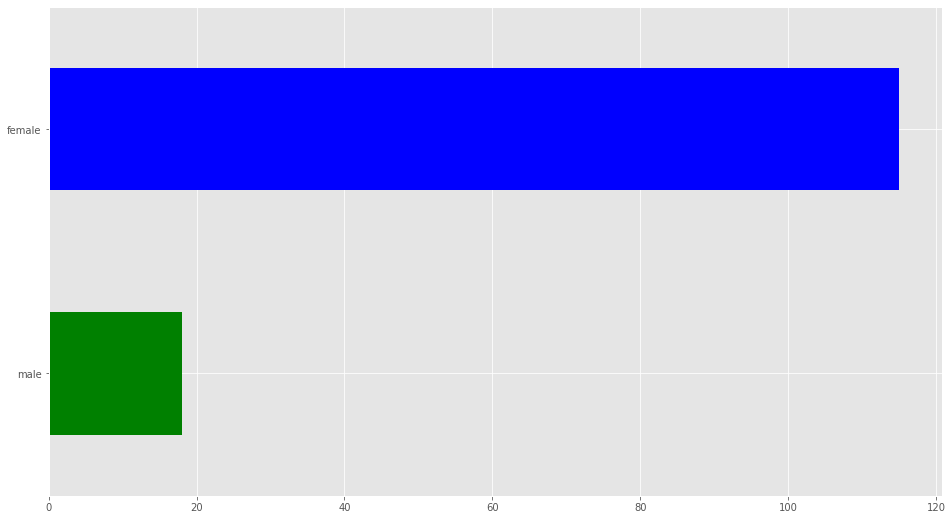

In [138]:
result.Sex.value_counts().sort_values().plot(kind = "barh", color={"green", "blue"})

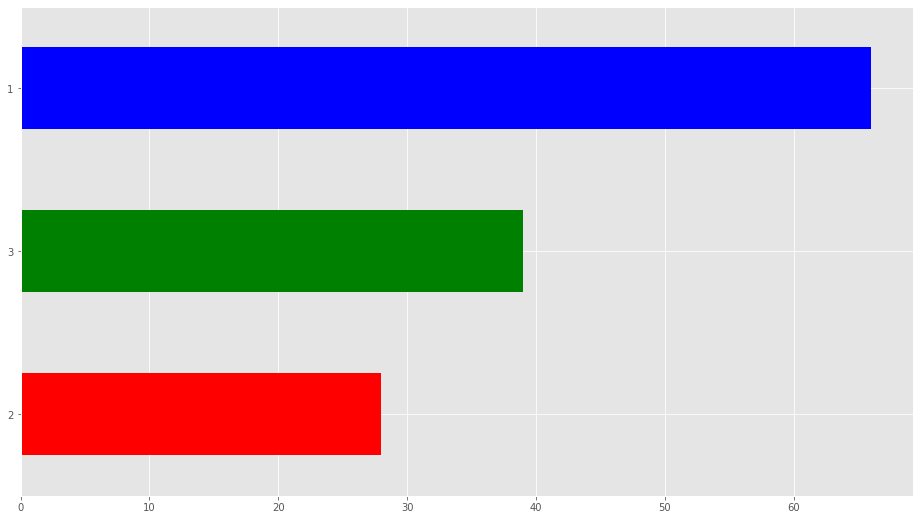

In [139]:
result.Pclass.value_counts().sort_values().plot(kind = "barh", color={"green", "blue", "red"})

In [140]:
result.Age.describe()

count    133.000000
mean      29.214962
std       14.880651
min        0.170000
25%       20.000000
50%       27.000000
75%       36.000000
max       76.000000
Name: Age, dtype: float64

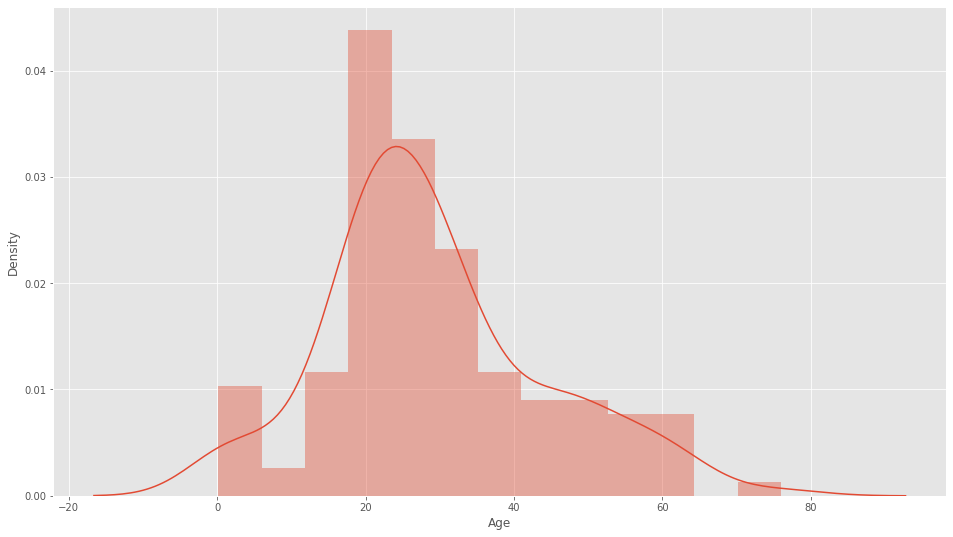

In [141]:
sns.distplot(result["Age"])

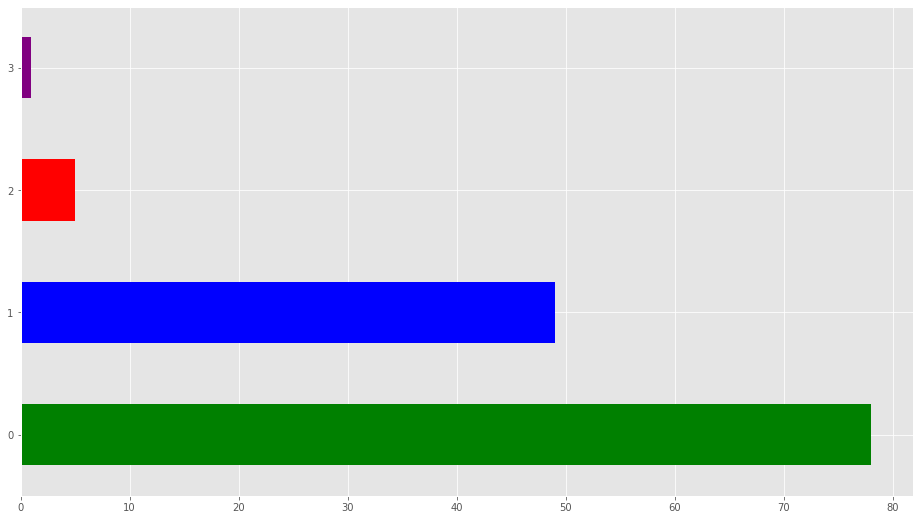

In [142]:
result.SibSp.value_counts().sort_index().plot(kind = "barh", color={"green", "blue", "red", "yellow", "purple"})

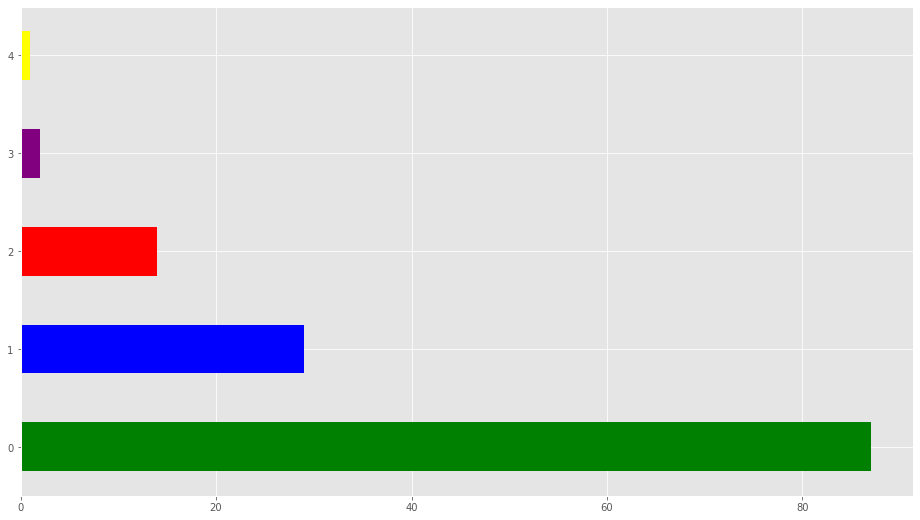

In [145]:
result.Parch.value_counts().sort_index().plot(kind = "barh", color={"green", "blue", "red", "yellow", "purple"})

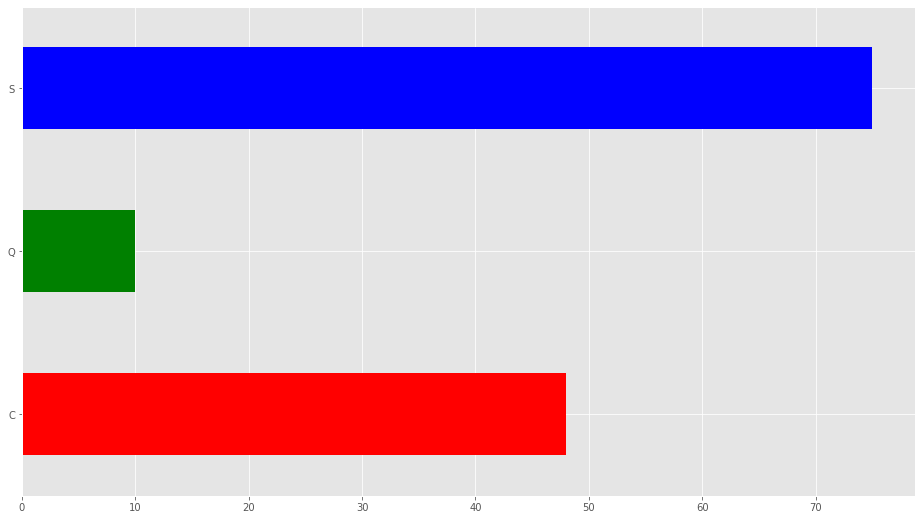

In [146]:
result.Embarked.value_counts().sort_index().plot(kind = "barh", color={"green", "blue", "red"})

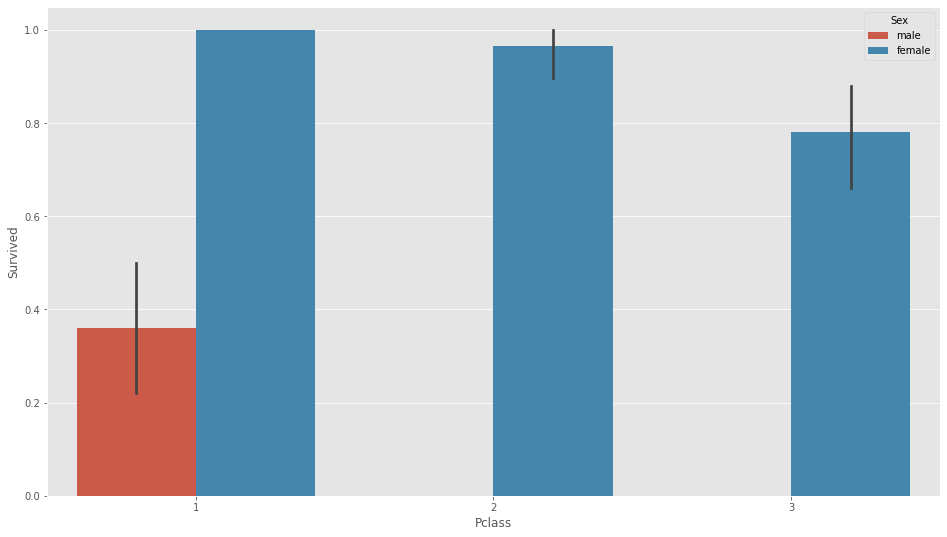

In [152]:
pre = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/db/test.csv")
pre.drop(["PassengerId","Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
pre.dropna(inplace=True)
pre["Survived"] = test_model["Survived"]
sns.barplot(x="Pclass", y="Survived", data=pre, hue="Sex")

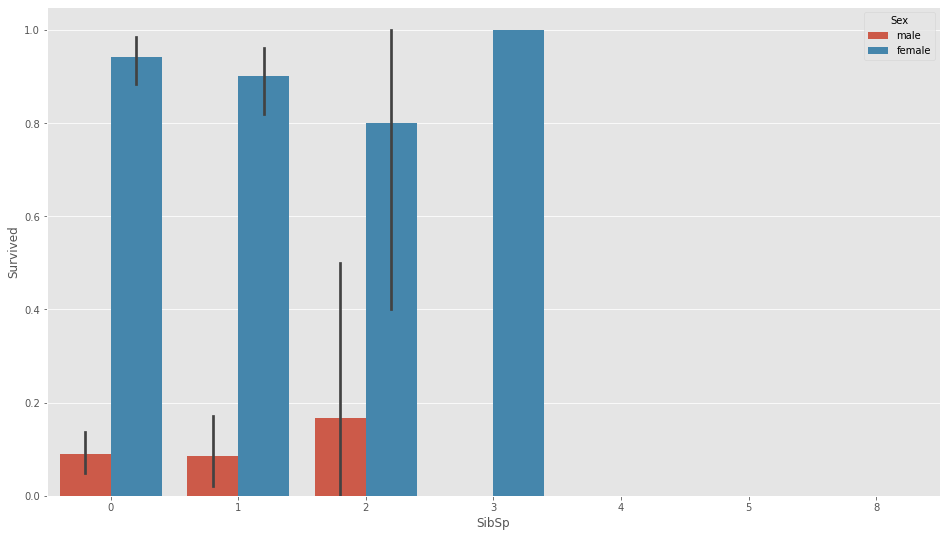

In [153]:
sns.barplot(x="SibSp", y="Survived", data=pre, hue="Sex")

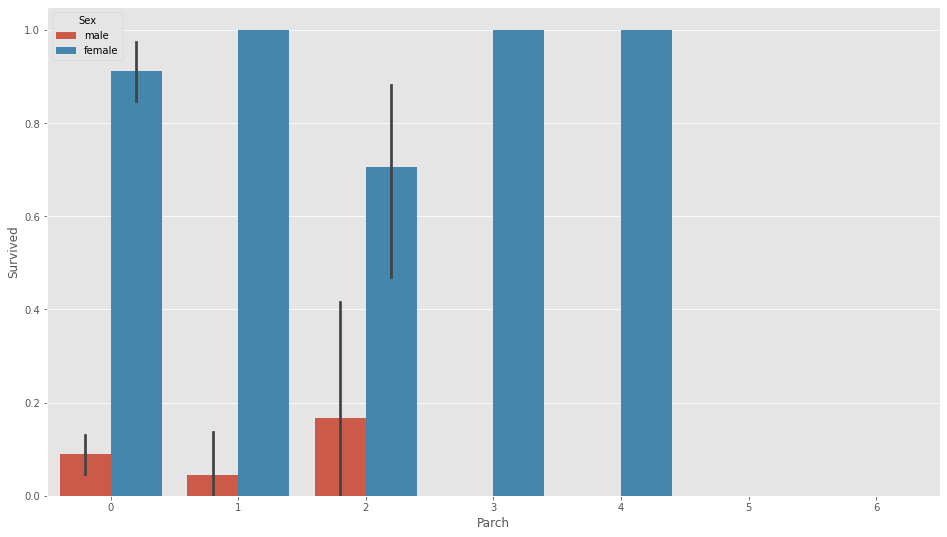

In [154]:
sns.barplot(x="Parch", y="Survived", data=pre, hue="Sex")

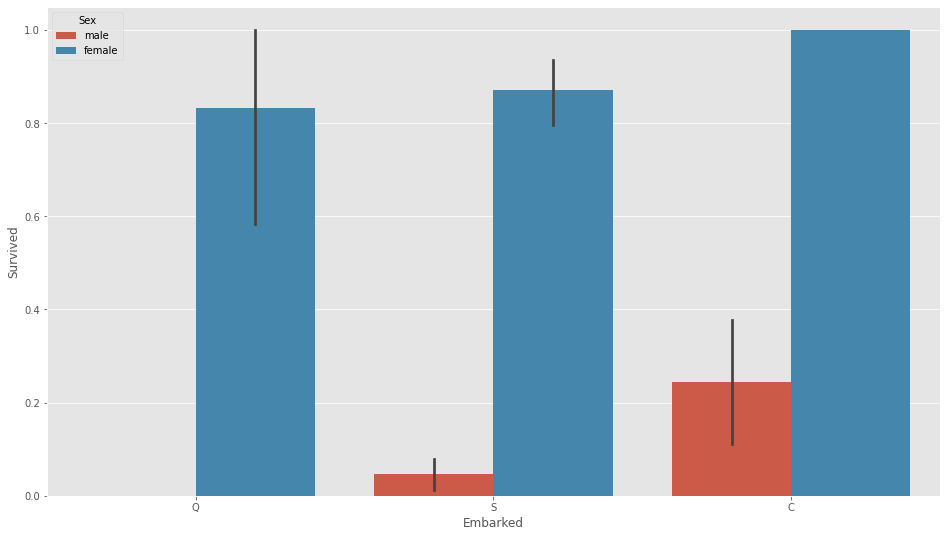

In [155]:
sns.barplot(x="Embarked", y="Survived", data=pre, hue="Sex")

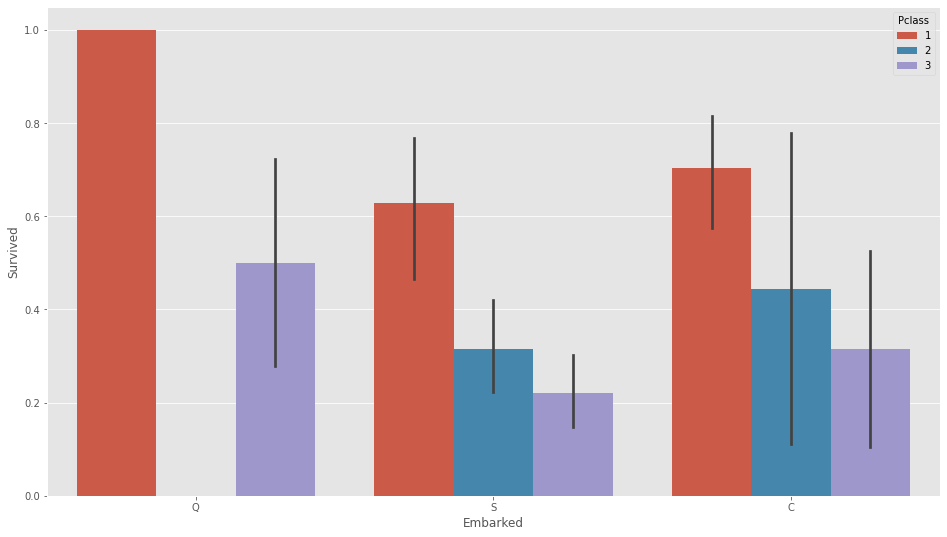

In [156]:
sns.barplot(x="Embarked", y="Survived", data=pre, hue = "Pclass")

# Conclusion